PRACTICA: Visualizaciones Geograficas



Importamos las librerias

In [1]:
# Importamos las librerias
#! pip install --upgrade plotly
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
print('Librerias Importadas')

Librerias Importadas


Conectamos el cuaderno actual con nuestro Drive

In [2]:
# Conectamos el cuaderno actual con nuestro Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos el archivo de Educativo

In [3]:
#Cargar un shapefile: Educativo
import geopandas as gpd
educativo = gpd.read_file('/content/drive/MyDrive/Capacitacion/Proyectos/Visualizacion/educativo.zip')

In [4]:
# Crear un id unico
educativo['ID'] = range(1, len(educativo) + 1)

In [5]:
educativo.sample(2)

,DEPARTAMEN,PROVINCIA,DISTRITO,N_EDUCATIV,geometry,ID
240,CAJAMARCA,CELENDIN,JORGE CHAVEZ,4,"POLYGON ((-78.09103 -6.90827, -78.08978 -6.908...",241
1738,PIURA,SULLANA,LANCONES,132,"POLYGON ((-80.48552 -4.08443, -80.48403 -4.085...",1739


In [6]:
print(educativo.crs)

EPSG:4326


<Axes: >

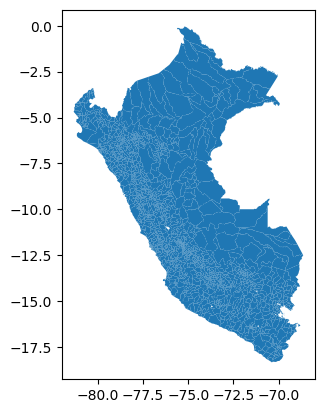

In [7]:
educativo.plot()

In [8]:
# Filtrar Lima y Callao
prov=['LIMA', 'CALLAO']
educativo_lima = educativo[(educativo['PROVINCIA'].isin(prov))]

<Axes: >

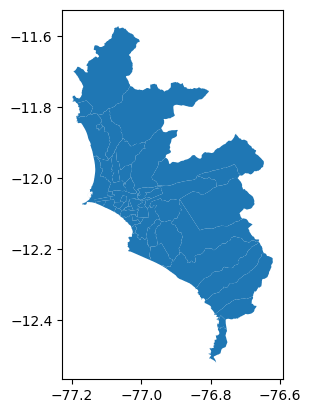

In [9]:
educativo_lima.plot()

In [18]:
educativo_lima.head(2)

,DEPARTAMEN,PROVINCIA,DISTRITO,N_EDUCATIV,geometry
ID,,,,,
379,LIMA,LIMA,LURIN,207,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1..."
427,LIMA,LIMA,ANCON,131,"POLYGON ((-77.06517 -11.57512, -77.06505 -11.5..."


In [21]:
educativo_lima.sample(2)

,DEPARTAMEN,PROVINCIA,DISTRITO,N_EDUCATIV,geometry
ID,,,,,
554,CALLAO,CALLAO,LA PUNTA,11,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0..."
1049,LIMA,LIMA,MIRAFLORES,123,"POLYGON ((-77.02656 -12.1082, -77.02631 -12.11..."


## Visualizacion: Choropleth

In [44]:
fig = px.choropleth_mapbox(
    educativo_lima,
    geojson=educativo_lima.geometry,
    locations=educativo_lima.index,
    color='N_EDUCATIV',
    color_continuous_scale="Viridis",
    opacity=0.3,
    mapbox_style="carto-positron",
    center={"lat":-12.038545222682666, "lon": -77.06021646269627},
    zoom=8,
    width=500,
    height=500,

)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    title_text='NUMERO DE COLEGIOS POR DISTRITO'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":30,"l":10,"b":10})

fig.show()

<ipython-input-44-0f5263516831>:1: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

